<a href="https://colab.research.google.com/github/Jesseniapq/predicciones-ventas/blob/main/P1_3_Prediccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import pandas as pd
data = '/content/drive/MyDrive/Coding Dojo - Data analyt - Febrero 2024/Ejercicios plataforma/Proyecto 1 - Parte 2- Predicciones ventas/sales_predictions.csv'

In [98]:
df = pd.read_csv(data)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [100]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [102]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [103]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [104]:
filtro_nulos_Item_Weight  = df['Item_Weight'].isna()
df[filtro_nulos_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [105]:
filtro_no_nulos = ~df['Item_Weight'].isna()
df_no_nulos = df[filtro_no_nulos]
df_no_nulos

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [106]:
df_no_nulos.groupby(['Item_Identifier', 'Item_Weight']).size()

Item_Identifier  Item_Weight
DRA12            11.600         6
DRA24            19.350         5
DRA59            8.270          6
DRB01            7.390          2
DRB13            6.115          5
                               ..
NCZ30            6.590          6
NCZ41            19.850         5
NCZ42            10.500         5
NCZ53            9.600          4
NCZ54            14.650         5
Length: 1555, dtype: int64

Podemos identificar que ya hay items con un peso establecido en filas anteriores. Por eso podemos completar y asumir que un mismo tipo de producto debe tener el mismo peso independientemente de donde se compre o en que año se vnedió. Debemos ordenear para que todos los que tienen data queden primero y asi el ffill completa la info del primero que encuentre.

In [107]:
df = df.sort_values(by=['Item_Identifier', 'Item_Weight'])

In [108]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].ffill()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 118 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [110]:
filtro_nulos_Item_Weight  = df['Item_Weight'].isna()
df[filtro_nulos_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Solo nos quedan 4 nulos, ompletaremos la sigueinte columna con nulos Outlet_Size

Podemos identificar que outlet_Size hay campos vacios, al revisar la data podemos identifiar que segun outet type es el outlet_size

- grocery small
- Supermarket Type2 small
- Supermarket Type2 medium
- Supermarket Type3  medium


In [111]:
df = df.sort_values(by=['Outlet_Type', 'Outlet_Location_Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 2879 to 1896
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [112]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].ffill()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 2879 to 1896
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [114]:
df.duplicated().sum()

0

In [115]:
df = df.dropna()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2879,DRA24,19.350,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
6179,DRA59,8.270,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772
1708,DRC25,5.730,Low Fat,0.079440,Soft Drinks,86.7882,OUT019,1985,Small,Tier 1,Grocery Store,85.8882
2950,DRD15,10.600,Low Fat,0.099442,Dairy,233.1642,OUT019,1985,Small,Tier 1,Grocery Store,697.0926
2766,DRD25,6.135,Low Fat,0.138270,Soft Drinks,111.6860,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
...,...,...,...,...,...,...,...,...,...,...,...,...
3613,NCZ06,19.600,Low Fat,0.093706,Household,253.8698,OUT027,1985,Medium,Tier 3,Supermarket Type3,3297.7074
1397,NCZ17,12.150,Low Fat,0.079047,Health and Hygiene,39.8506,OUT027,1985,Medium,Tier 3,Supermarket Type3,1480.0734
4523,NCZ30,6.590,LF,0.026058,Household,121.9098,OUT027,1985,Medium,Tier 3,Supermarket Type3,3374.2744
2084,NCZ53,9.600,Low Fat,0.024359,Health and Hygiene,190.4214,OUT027,1985,Medium,Tier 3,Supermarket Type3,5652.6420


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 2879 to 1896
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8519.0,12.875420,4.646098,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8519.0,0.066112,0.051586,0.000,0.026983,0.053925,0.094558,0.328391
Item_MRP,8519.0,141.010019,62.283594,31.290,93.844900,143.047000,185.676600,266.888400
Outlet_Establishment_Year,8519.0,1997.837892,8.369105,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8519.0,2181.188779,1706.511093,33.290,834.247400,1794.331000,3100.630600,13086.964800


In [118]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [119]:
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)

In [120]:
df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

In [121]:
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)

In [122]:
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

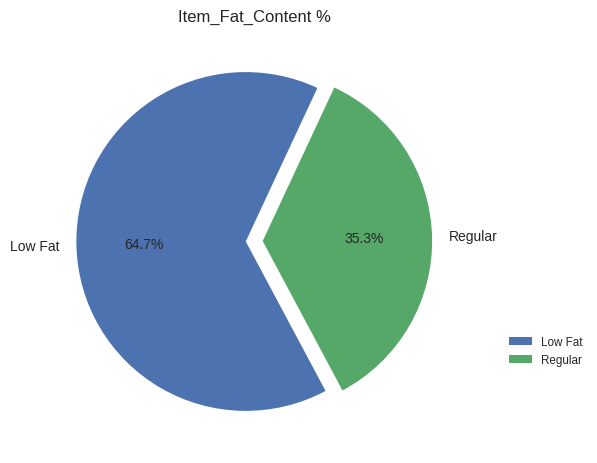

In [123]:
import matplotlib.pyplot as plt

val=df["Item_Fat_Content"].value_counts()
etiquetas=["Low Fat", "Regular"]
explotar=[0.05] * len(val)
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.pie(val, labels=etiquetas, autopct="%.1f%%", explode=explotar, startangle=65, textprops={'fontsize': 10})
ax.legend(etiquetas, bbox_to_anchor=(0.8, -0.2, 0.5, 0.5), fontsize="small")
plt.title('Item_Fat_Content %')
plt.show()

en su mayoria nuestros productos son mayo en grasa el 64.7% para ser exactos

In [124]:
filtro_1 = df['Item_Fat_Content'] == 'Regular'
filtro_2 = df['Item_Fat_Content'] == 'Low Fat'

df_filtro_1 = df[filtro_1]
df_filtro_2 = df[filtro_2]


In [132]:
df_filtro_1_group = df_filtro_1.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].mean().reset_index()
df_filtro_2_group = df_filtro_2.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].mean().reset_index()

In [133]:
df_filtro_2_group

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,341.392019
1,Supermarket Type1,2288.035628
2,Supermarket Type2,2008.871133
3,Supermarket Type3,3642.638097


In [135]:
df_filtro_1_group

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,337.486426
1,Supermarket Type1,2367.795569
2,Supermarket Type2,1971.266341
3,Supermarket Type3,3793.643145


<ipython-input-134-0797bcdbd312>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


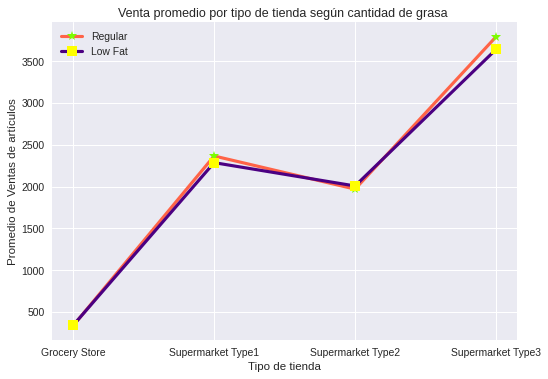

In [134]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
plt.figure(dpi=75)
plt.plot(df_filtro_1_group["Outlet_Type"], df_filtro_1_group["Item_Outlet_Sales"], color="tomato", marker="*",  markerfacecolor="lawngreen",   lw=3,  ms=10,label="Regular")
plt.plot(df_filtro_2_group["Outlet_Type"], df_filtro_2_group["Item_Outlet_Sales"], color="indigo", marker="s", markerfacecolor="yellow", lw=3,  ms=10, label="Low Fat")
plt.ylabel("Promedio de Ventas de artículos")
plt.xlabel("Tipo de tienda")
plt.title("Venta promedio por tipo de tienda según cantidad de grasa ")
plt.legend()
plt.show()

Nos podemos dar cuenta que independientemente del tipo de tienda, la venta de ambos tipos de productos suelen ser en la misma propoción. Además tambien podemos ver que en los supermercados tipo 3 hay una venta promedio más alta lo que nos indica que ambos productos cuestan mas en es etipo de tiendas.

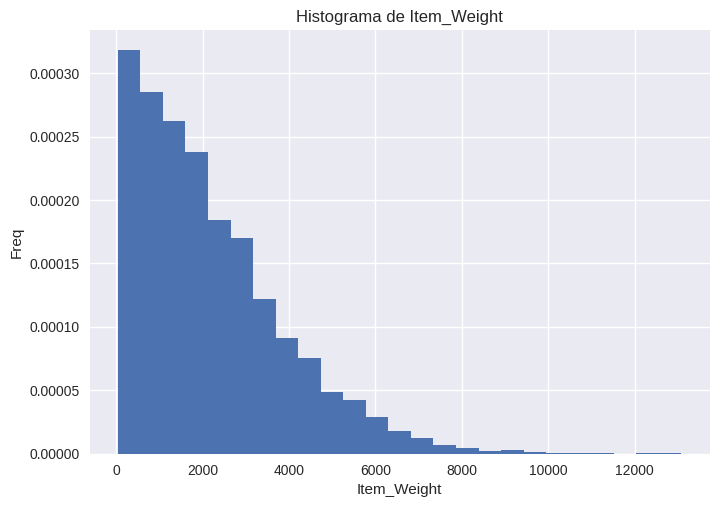

In [142]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

num_bins = 25
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.hist(df['Item_Outlet_Sales'], num_bins, density=True)

ax1.set_xlabel("Item_Weight")
ax1.set_ylabel("Freq")
ax1.set_title("Histograma de Item_Weight")

plt.show()

Esto indica que la mayor parte de la concentración de datos se encuentra al comienzo de la distribución, los valores altos ocurren con baja frecuencia. Es decir la mayoria de productos tiene peso bajo.